In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
ID                     6338 non-null object
sex                    6338 non-null object
Aged                   6338 non-null object
Married                6338 non-null object
TotalDependents        6338 non-null object
ServiceSpan            6338 non-null int64
MobileService          6338 non-null object
4GService              6338 non-null object
CyberProtection        6338 non-null object
HardwareSupport        6338 non-null object
TechnicalAssistance    6338 non-null object
FilmSubscription       6338 non-null object
SettlementProcess      6338 non-null object
QuarterlyPayment       6338 non-null float64
GrandPayment           6328 non-null float64
CustomerAttrition      6338 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 792.4+ KB


,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [7]:
X = data.iloc[:,1:]
df = pd.DataFrame(X)

In [8]:
df.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [14]:
df['GrandPayment'] = df['GrandPayment'].astype('float64')
df['QuarterlyPayment'] = df['QuarterlyPayment'].astype('float64')
df['ServiceSpan'] = df['ServiceSpan'].astype('int64')



df['CustomerAttrition'] = df['CustomerAttrition'].astype(str).str.strip().astype('category')
df['sex'] = df['sex'].astype('category')
df['SettlementProcess'] = df['SettlementProcess'].astype('category')
df['Aged'] = df['Aged'].astype('category')
df['Married'] = df['Married'].astype('category')
df['TotalDependents'] = df['TotalDependents'].astype('category')
df['MobileService'] = df['MobileService'].astype('category')
df['4GService'] = df['4GService'].astype('category')
df['HardwareSupport'] = df['HardwareSupport'].astype('category')
df['TechnicalAssistance'] = df['TechnicalAssistance'].astype('category')
df['FilmSubscription'] = df['FilmSubscription'].astype('category')
df['SettlementProcess'] = df['SettlementProcess'].astype('category')

In [15]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Preview of data:


,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,TechnicalAssistance\t
0,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,Yes
1,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,No
2,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,Yes



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
sex                     6338 non-null category
Aged                    6338 non-null category
Married                 6338 non-null category
TotalDependents         6338 non-null category
ServiceSpan             6338 non-null int64
MobileService           6338 non-null category
4GService               6338 non-null category
CyberProtection         6338 non-null object
HardwareSupport         6338 non-null category
TechnicalAssistance     6338 non-null category
FilmSubscription        6338 non-null category
SettlementProcess       6338 non-null category
QuarterlyPayment        6338 non-null float64
GrandPayment            6328 non-null float64
CustomerAttrition       6338 non-null category
TechnicalAssistance	    6338 non-null category
dtypes: category(12), float64(2), int64(1), object(1)
memory usag

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,TechnicalAssistance\t
643,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,NaN,No,No
1169,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,NaN,No,Yes
1186,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN,No,No


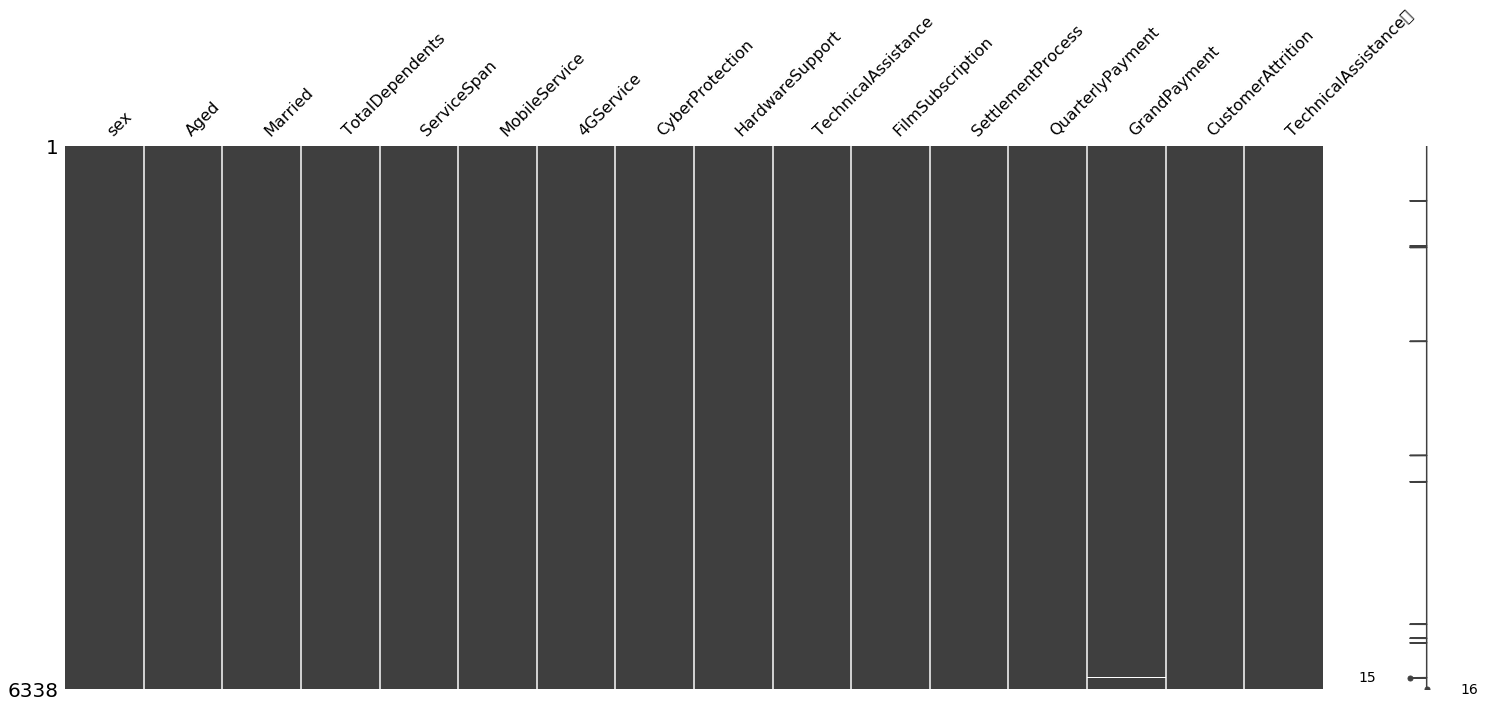


No duplicated entries found

To check: 
Unique count of non-numeric data

sex                      2
Aged                     2
Married                  2
TotalDependents          2
MobileService            2
4GService                3
CyberProtection          2
HardwareSupport          2
TechnicalAssistance      2
FilmSubscription         2
SettlementProcess        4
CustomerAttrition        2
TechnicalAssistance\t    2
dtype: int64
Top 5 unique values of sex
      sex  Count
0    Male   3213
1  Female   3125
 
Top 5 unique values of Aged
  Aged  Count
0   No   5309
1  Yes   1029
 
Top 5 unique values of Married
  Married  Count
0      No   3273
1     Yes   3065
 
Top 5 unique values of TotalDependents
  TotalDependents  Count
0              No   4432
1             Yes   1906
 
Top 5 unique values of MobileService
  MobileService  Count
0           Yes   5772
1            No    566
 
Top 5 unique values of 4GService
             4GService  Count
0       Wifi Broadband   2794
1  Satel

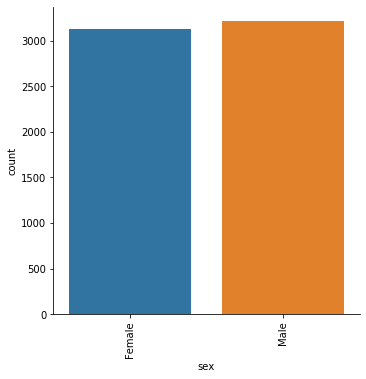

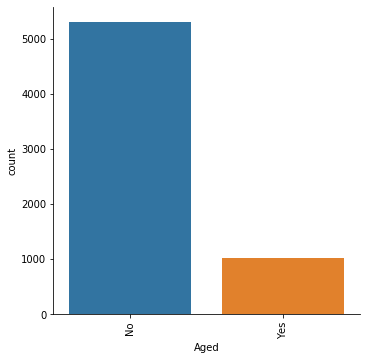

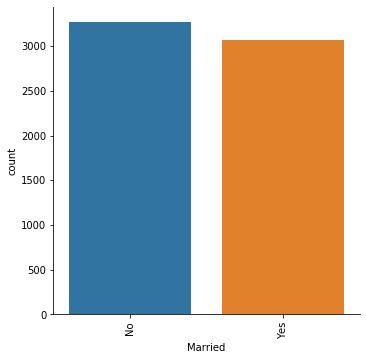

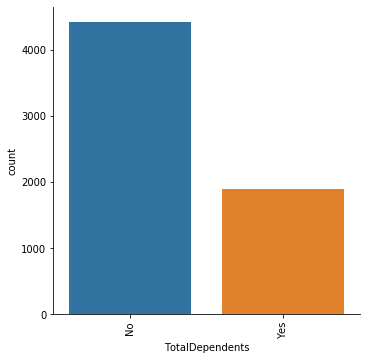

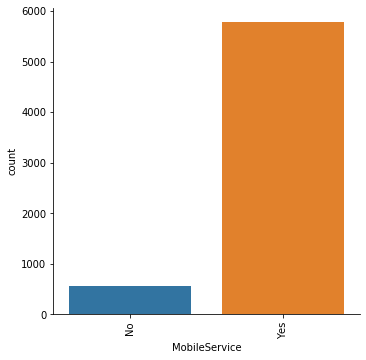

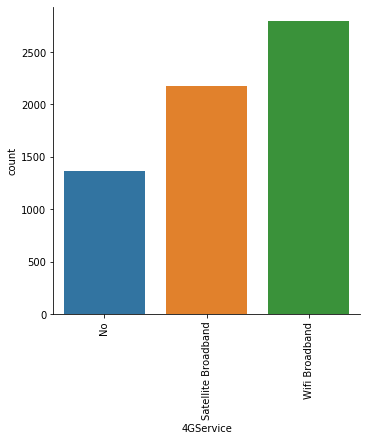

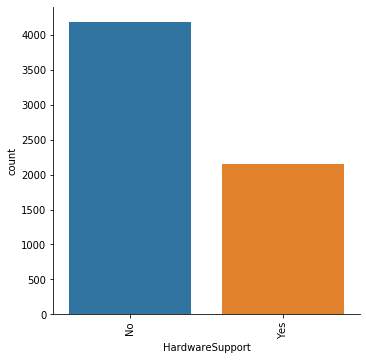

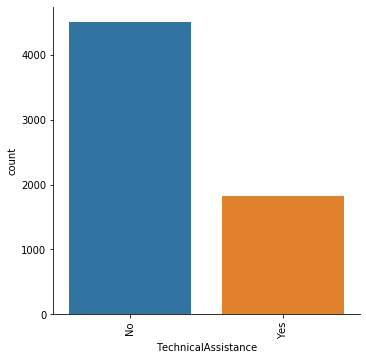

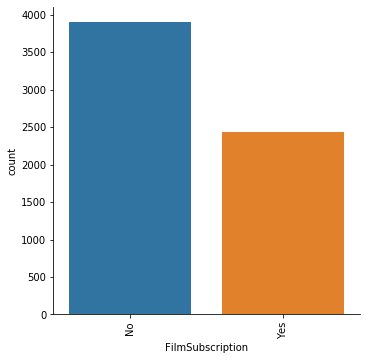

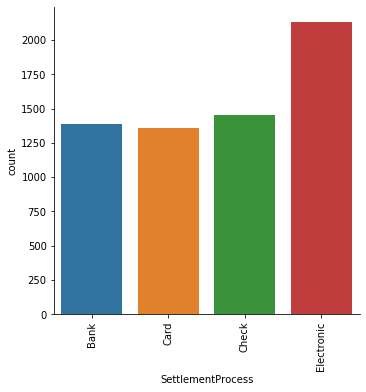

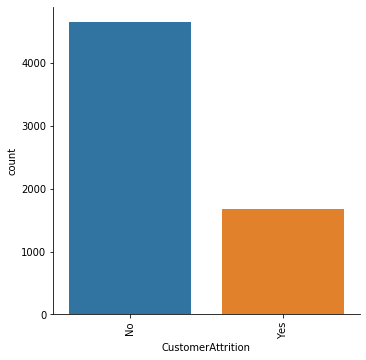

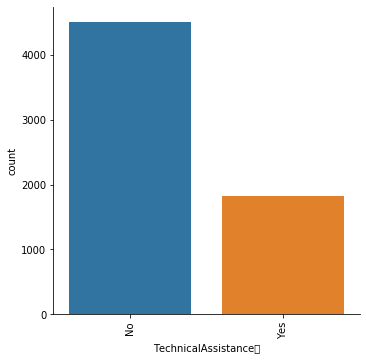


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
ServiceSpan,6338.0,31.946040,24.559659,-2.000000,8.000000,29.000000,55.000000,73.000000
QuarterlyPayment,6338.0,64.814490,30.191091,16.504109,35.645524,70.534085,90.058498,120.159190
GrandPayment,6328.0,2290.544207,2265.181098,16.297961,401.849530,1407.589119,3823.855846,8685.848657


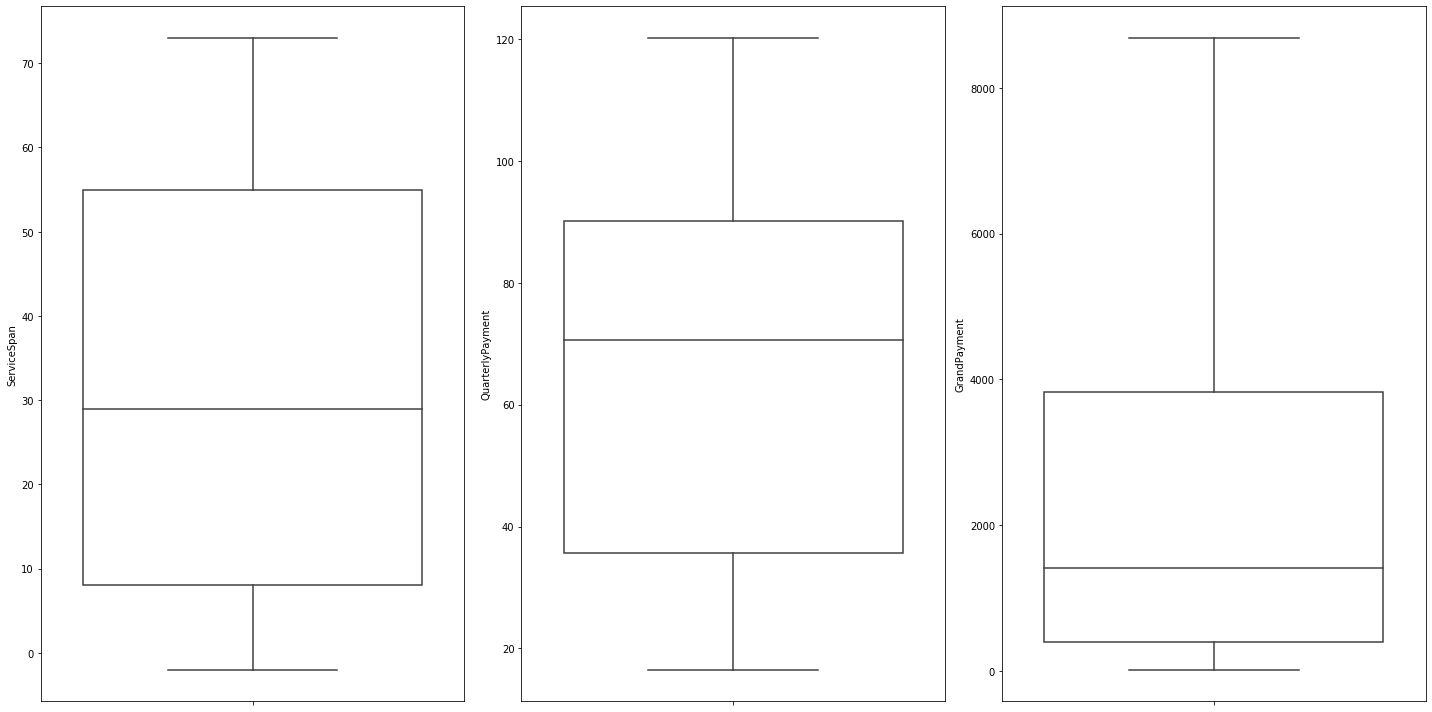

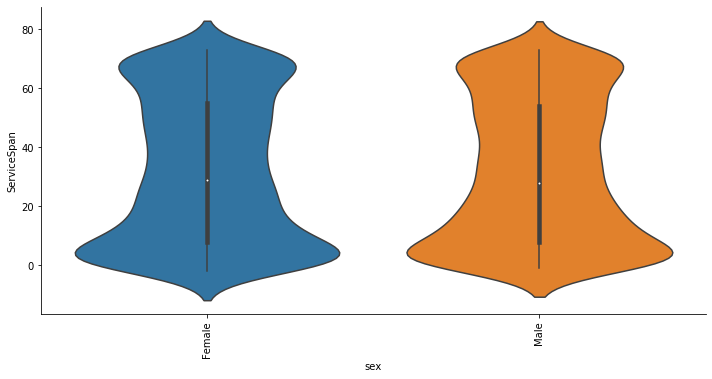

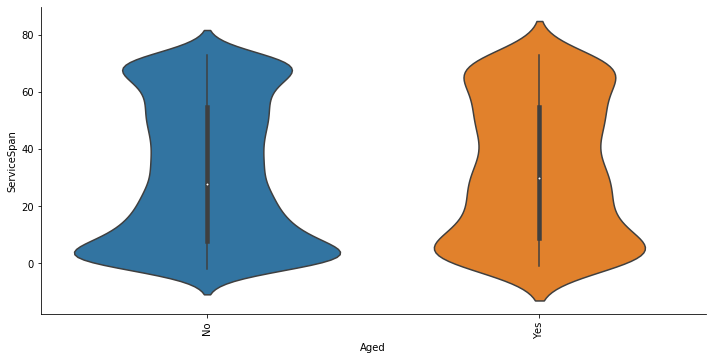

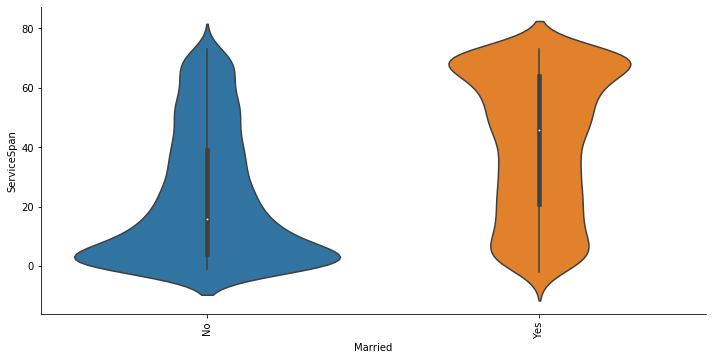

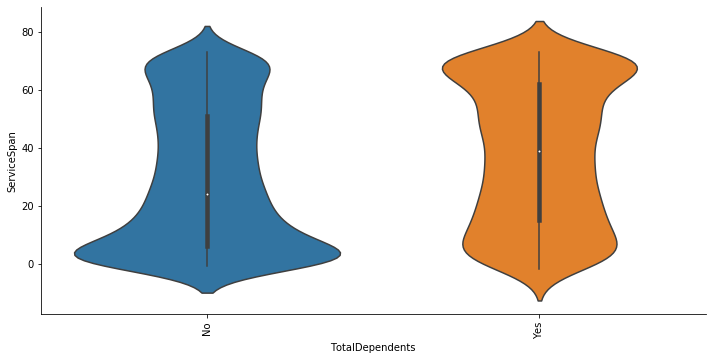

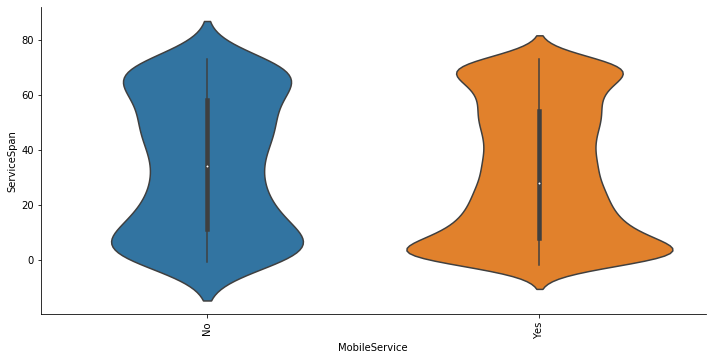

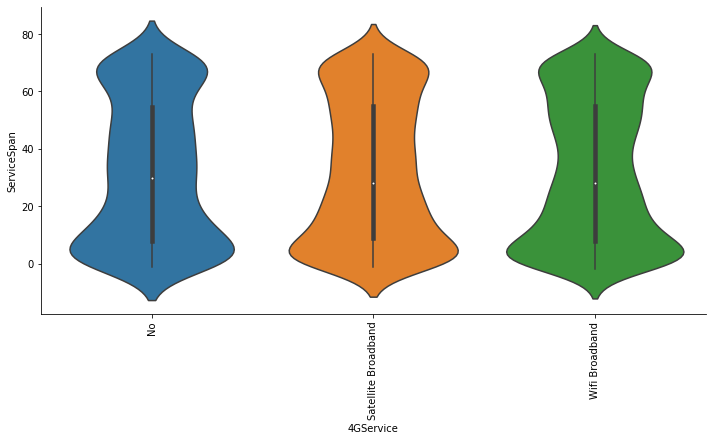

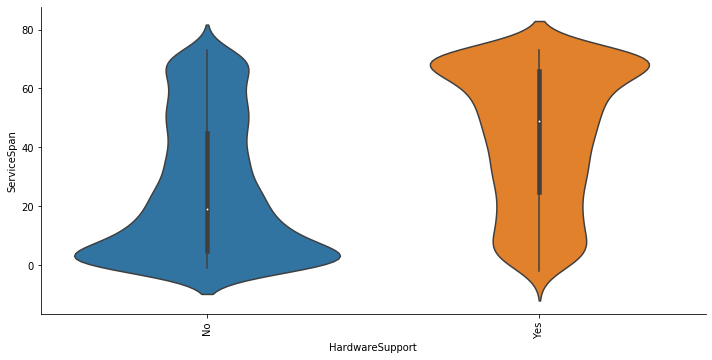

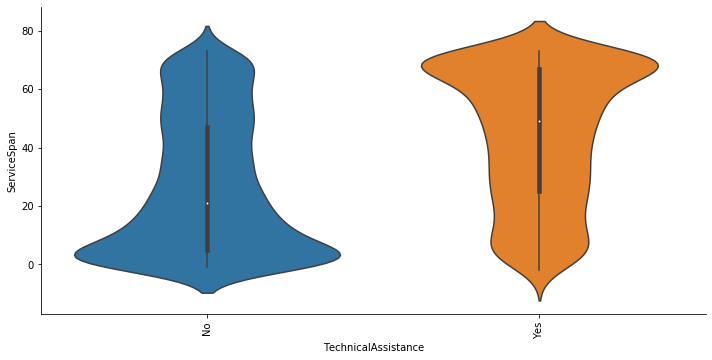

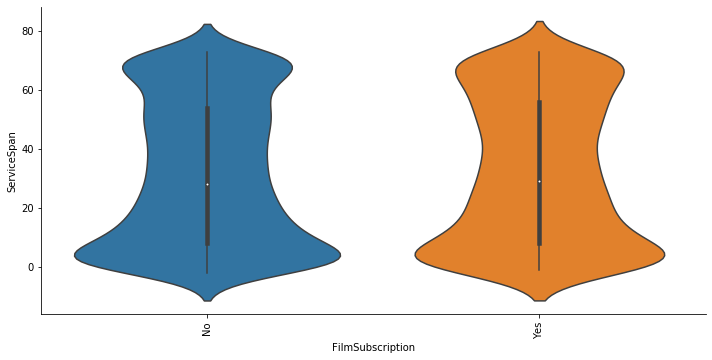

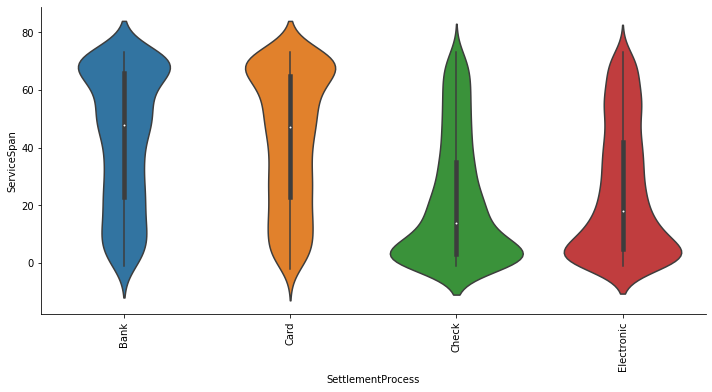

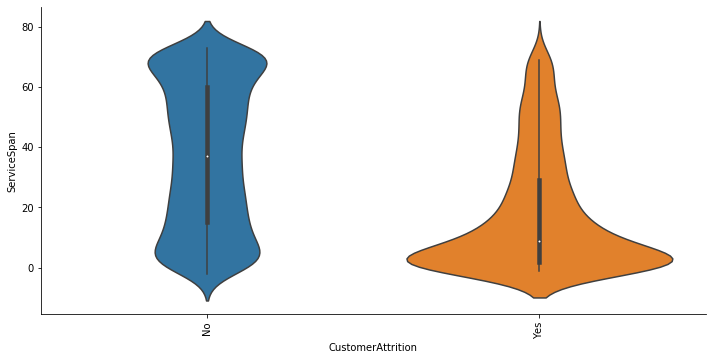

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


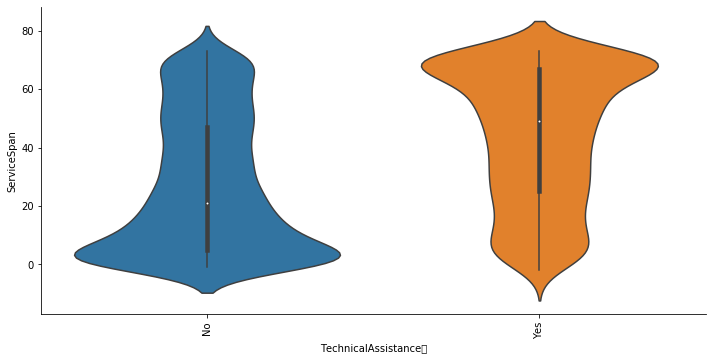

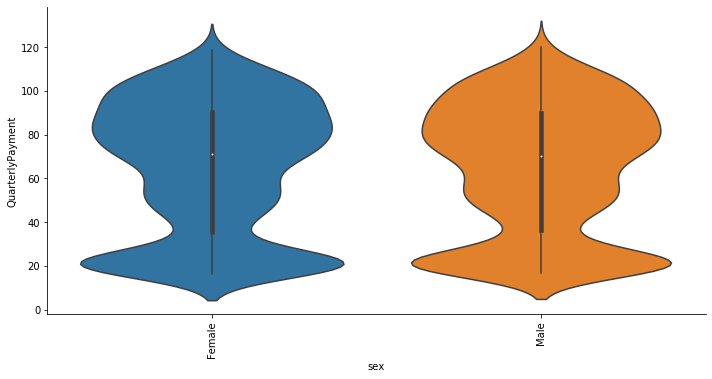

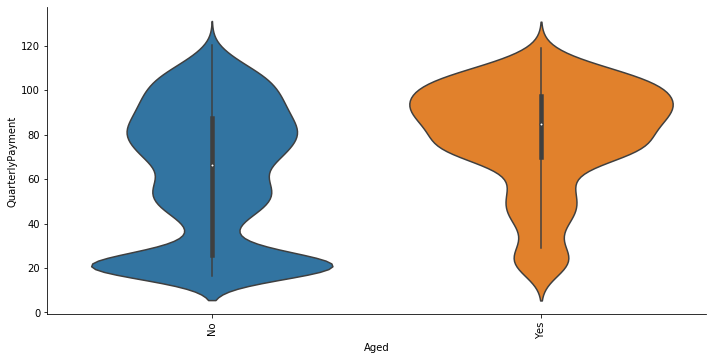

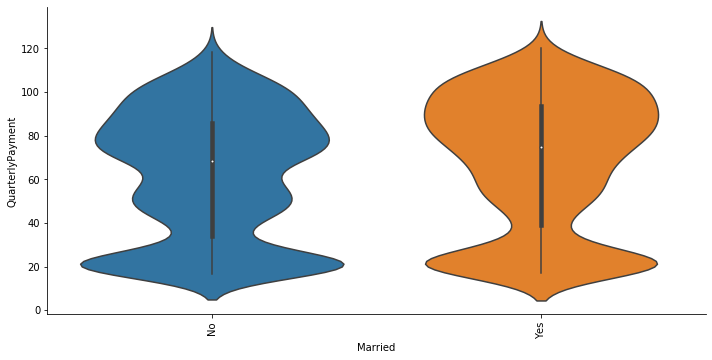

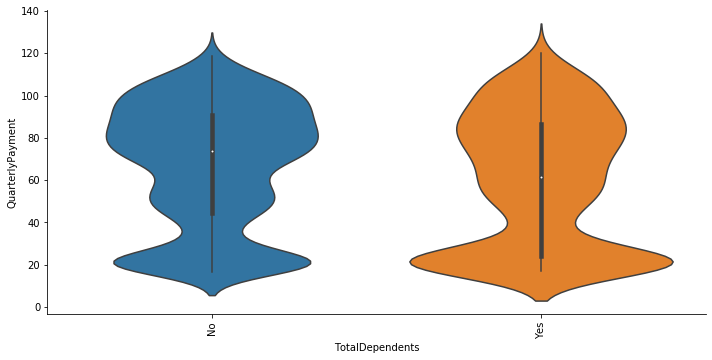

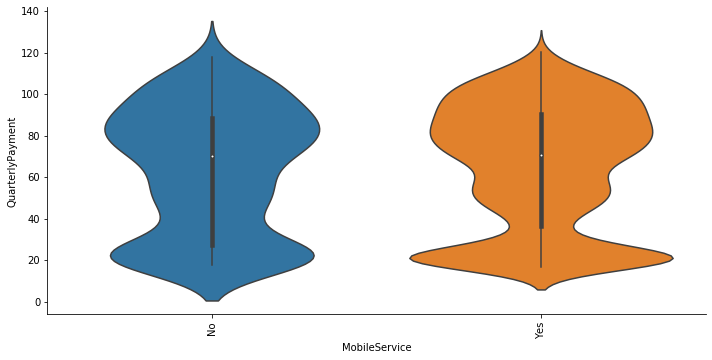

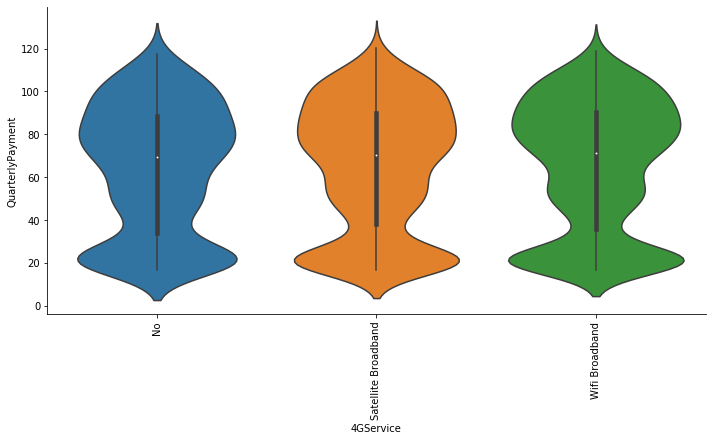

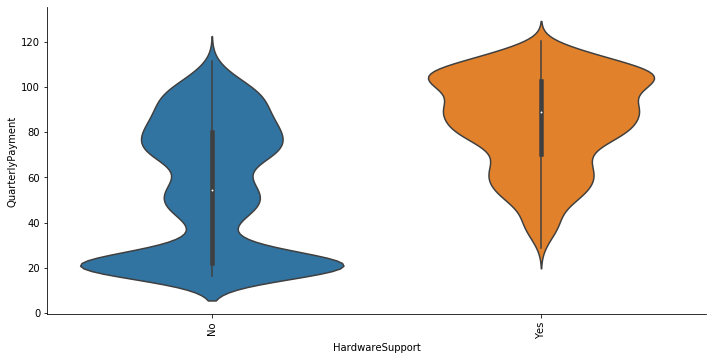

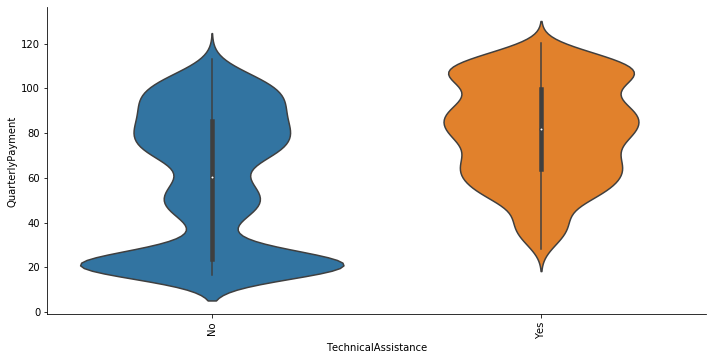

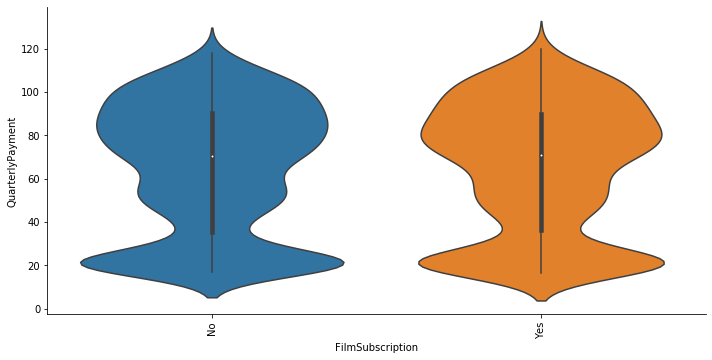

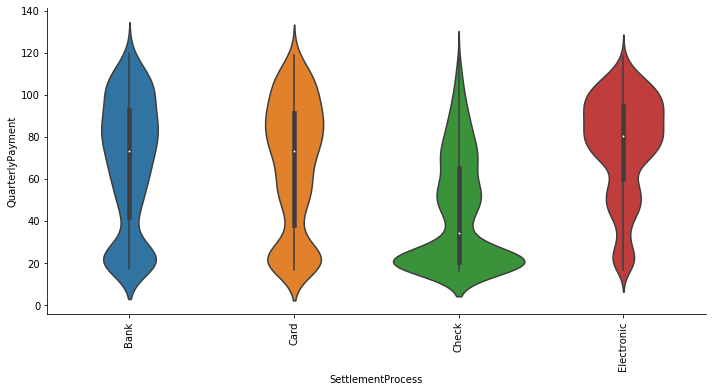

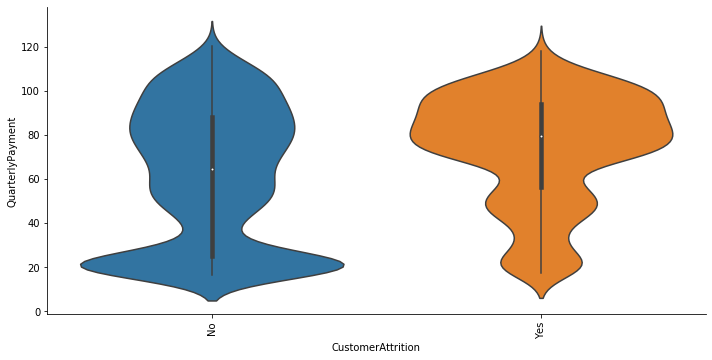

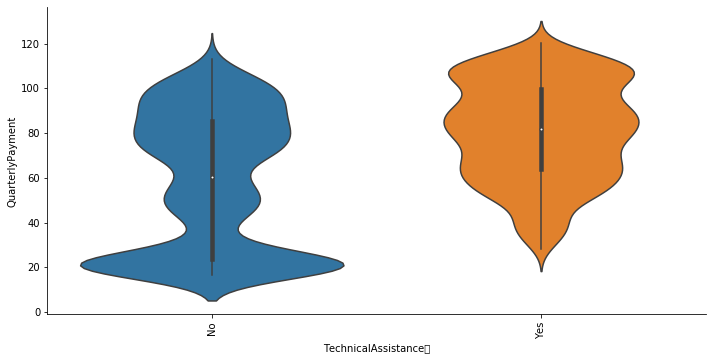

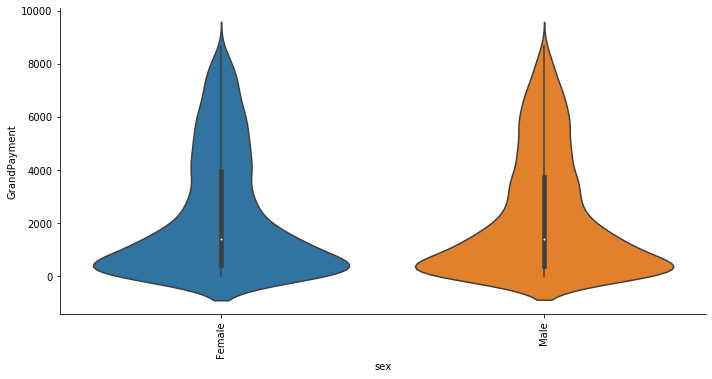

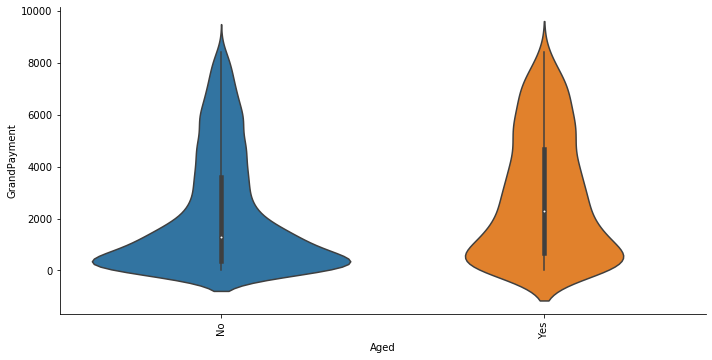

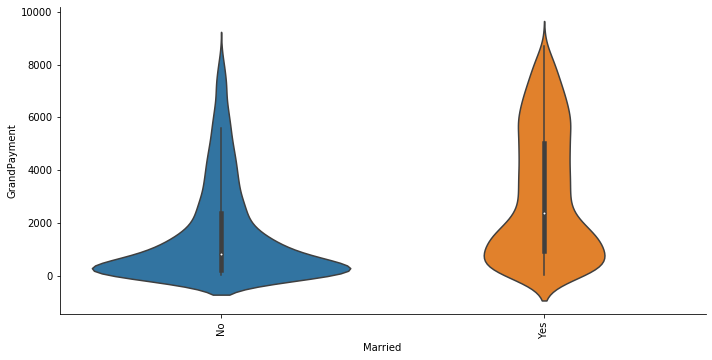

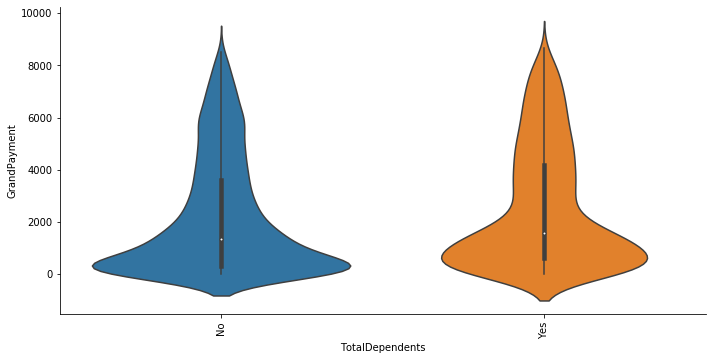

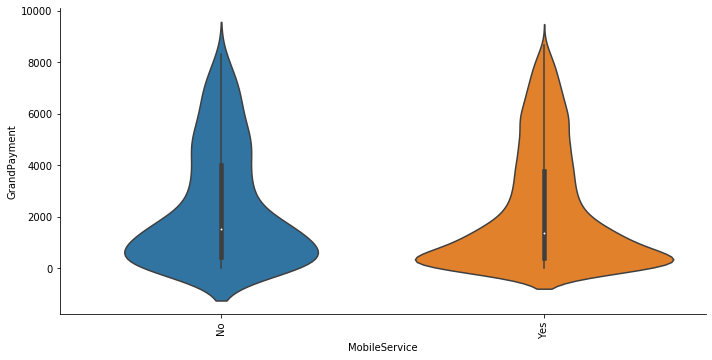

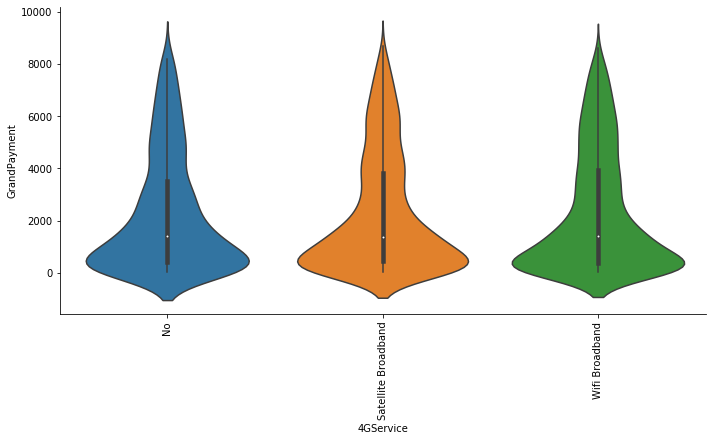

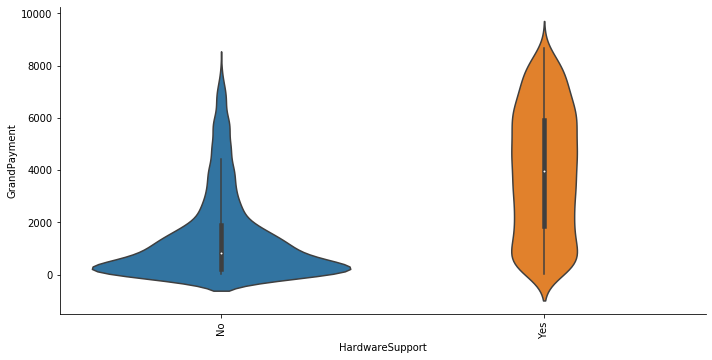

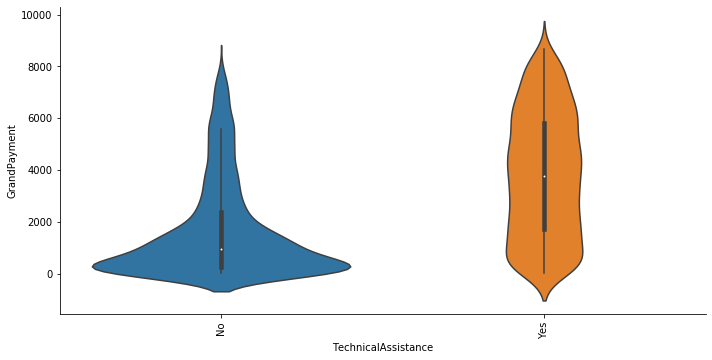

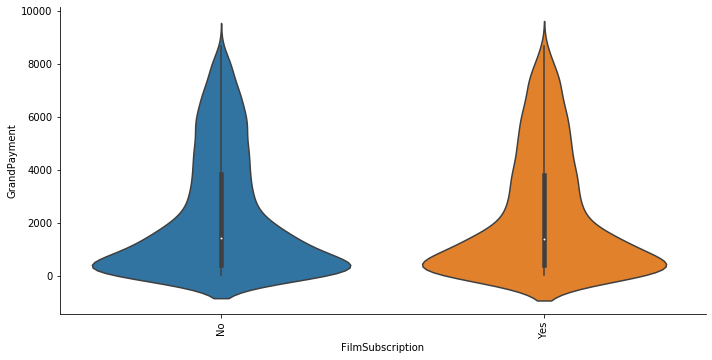

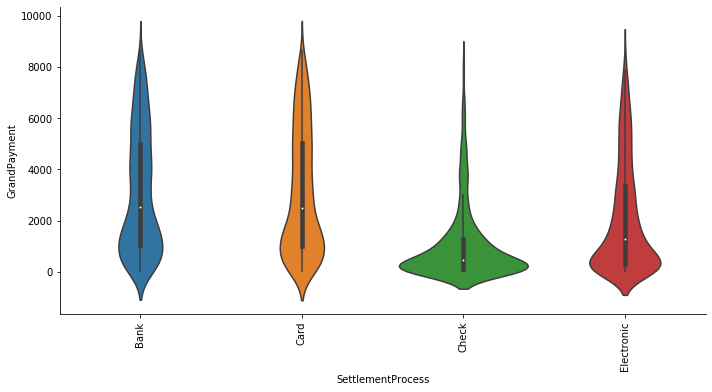

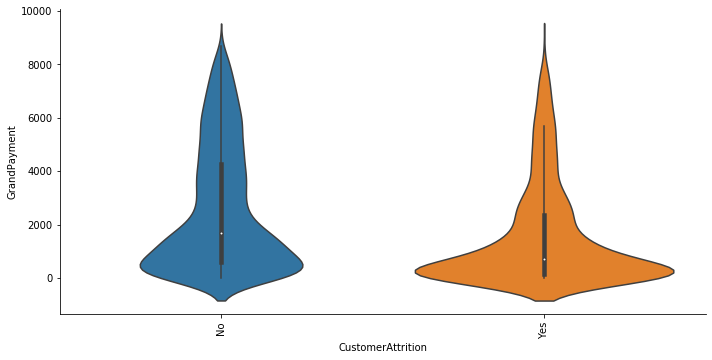

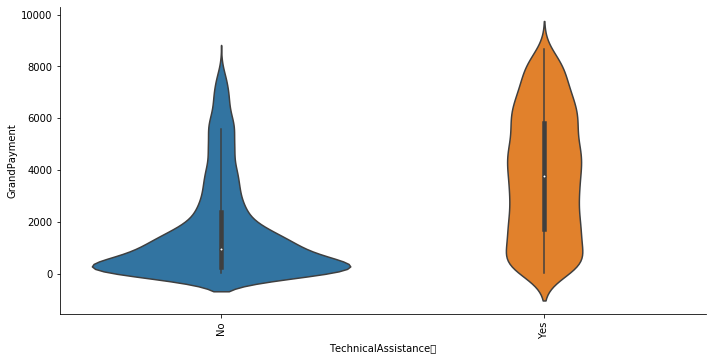


To check pairwise joint distribution of numeric data


C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


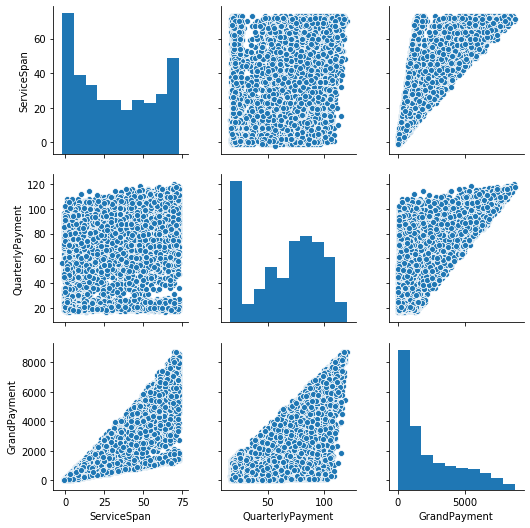


To check time series of numeric data  by daily, monthly and yearly frequency


In [17]:
eda(df)